In [1]:
# Question 4: Coloring the triangular lattice

import networkx as nx
import matplotlib.pyplot as plt
import dwavebinarycsp
from dwave.system import DWaveSampler, EmbeddingComposite

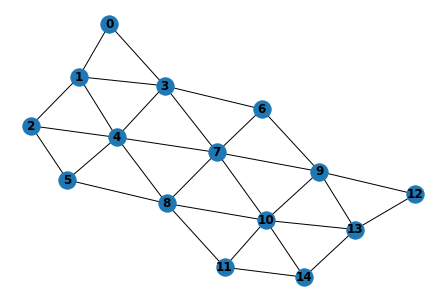

In [19]:
# Generate the graph

G = nx.triangular_lattice_graph(4,4)
G = nx.convert_node_labels_to_integers(G)
nx.draw(G, with_labels=True, font_weight='bold')
plt.savefig('graph_A6.pdf')

In [3]:
# Get nodes and neighbours from the graph

nodes = nx.nodes(G)
neighs = nx.edges(G)

In [4]:
# Function for the constraint that two nodes with a shared edge can't both select one colour

def not_both_1(v, u):
    return not (v and u)

In [5]:
# Valid configurations for the constraint that each node select a single colour

one_color_configurations = {(0, 0, 1), (0, 1, 0), (1, 0, 0)}

colors = len(one_color_configurations)

In [6]:
# Create a binary constraint satisfaction problem

csp = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)

In [7]:
# Add constraint that each node select a single color

for node in nodes:
    variables = [str(node)+str(i) for i in range(colors)]
    csp.add_constraint(one_color_configurations, variables)

In [8]:
# Add constraint that each pair of nodes with a shared edge not both select one color

for neighbor in neighs:
    v, u = neighbor
    for i in range(colors):
        variables = [str(v)+str(i), str(u)+str(i)]
        csp.add_constraint(not_both_1, variables)

In [10]:
# Convert csp into binary quadratic model

bqm = dwavebinarycsp.stitch(csp)

In [20]:
# Run on QPU; Sample 1000 times

sampler = EmbeddingComposite(DWaveSampler())      
sampleset = sampler.sample(bqm, num_reads=1000)

In [21]:
sample = sampleset.first.sample
if not csp.check(sample): 
    print("Failed to color map with only three colours")
else:
    print(sample)

Failed to color map with only three colours


In [17]:
# Function that plots a returned sample (modified from example in Ocean documentation)
def plot_map(sample):
    G = nx.triangular_lattice_graph(4,4)
    G.add_nodes_from(nodes)
    G.add_edges_from(neighs)
    # Translate from binary to integer color representation
    color_map = {}
    for node in nodes:
          for i in range(colors):
            if sample[str(node)+str(i)]:
                color_map[str(node)] = i
    # Plot the sample with color-coded nodes
    node_colors = [color_map.get(str(node)) for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=node_colors, node_size=1500, cmap=plt.cm.rainbow)
    plt.show()

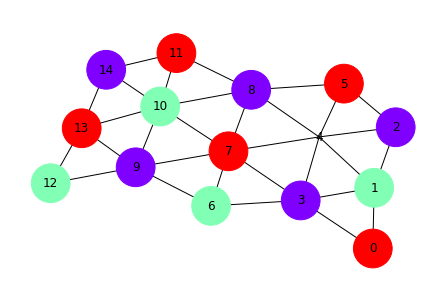

In [22]:
plot_map(sample)